In [1]:
import numpy as np
import pandas as pd
from zipfile import ZipFile
with ZipFile("/content/forecasting-unit-sales-vit-task-2.zip", 'r') as Object:
    Object.extractall()
Object.close()

In [2]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [3]:
train

ID        date     Item Id  \
0       2022-04-12_B09KDTS4DC  2022-04-12  B09KDTS4DC   
1       2022-04-12_B09MR2MLZH  2022-04-12  B09MR2MLZH   
2       2022-04-12_B09KSYL73R  2022-04-12  B09KSYL73R   
3       2022-04-12_B09KT5HMNY  2022-04-12  B09KT5HMNY   
4       2022-04-12_B09KTF8ZDQ  2022-04-12  B09KTF8ZDQ   
...                       ...         ...         ...   
101485  2024-05-31_B0CR4BGLK5  2024-05-31  B0CR4BGLK5   
101486  2024-05-31_B0CR4BG4ZW  2024-05-31  B0CR4BG4ZW   
101487  2024-05-31_B0CR49NR3B  2024-05-31  B0CR49NR3B   
101488  2024-05-31_B0CR49N6MQ  2024-05-31  B0CR49N6MQ   
101489  2024-05-31_B0CR4BK4FW  2024-05-31  B0CR4BK4FW   

                                                Item Name  ad_spend anarix_id  \
0       NapQueen Elizabeth 8" Gel Memory Foam Mattress...       NaN  NAPQUEEN   
1       NapQueen 12 Inch Bamboo Charcoal Queen Size Me...       NaN  NAPQUEEN   
2          NapQueen Elsa 8" Innerspring Mattress, Twin XL       NaN  NAPQUEEN   
3             NapQueen Elsa 6" Innerspring Mattress, Twin       NaN  NAPQUEEN   
4          NapQueen Elsa 6" Innerspring Mattress, Twin XL       NaN  NAPQUEEN   
...                                                   ...       ...       ...   
101485                                                NaN    604.73  NAPQUEEN   
101486                                                NaN    261.21  NAPQUEEN   
101487                                                NaN      0.00  NAPQUEEN   
101488                                                NaN      0.00  NAPQUEEN   
101489                                                NaN      0.00  NAPQUEEN   

        units  unit_price  
0         0.0        0.00  
1         0.0        0.00  
2         0.0        0.00  
3         0.0        0.00  
4         0.0        0.00  
...       ...         ...  
101485    NaN        0.00  
101486    2.0      225.32  
101487    NaN        0.00  
101488    NaN        0.00  
101489    NaN        0.00  

[101490 rows x 8 columns]

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101490 entries, 0 to 101489
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          101490 non-null  object 
 1   date        101490 non-null  object 
 2   Item Id     101488 non-null  object 
 3   Item Name   99658 non-null   object 
 4   ad_spend    77303 non-null   float64
 5   anarix_id   101490 non-null  object 
 6   units       83592 non-null   float64
 7   unit_price  101490 non-null  float64
dtypes: float64(3), object(5)
memory usage: 6.2+ MB


In [5]:
train.describe()

ad_spend         units     unit_price
count  77303.000000  83592.000000  101490.000000
mean     110.771470     10.284381     106.750922
std      529.303777     68.945915     425.704733
min        0.000000   -173.000000   -8232.000000
25%        0.000000      0.000000       0.000000
50%        4.230000      1.000000       0.000000
75%       44.310000      5.000000       0.000000
max    47934.990000   9004.000000   21557.390000

### Handling Missing Value

In [6]:
import pandas as pd


missing_values = train.isnull().sum()
print(missing_values)


ID                0
date              0
Item Id           2
Item Name      1832
ad_spend      24187
anarix_id         0
units         17898
unit_price        0
dtype: int64


In [7]:
#Mapping with repeted similar data

train_copy = train.copy()

item_mapping = train_copy[['Item Id', 'Item Name', 'unit_price']].dropna().drop_duplicates().set_index('Item Id')
def fill_missing_values(row):
    if pd.isna(row['Item Name']) and row['Item Id'] in item_mapping.index:
        row['Item Name'] = item_mapping.loc[row['Item Id'], 'Item Name']

    if pd.isna(row['unit_price']) and row['Item Id'] in item_mapping.index:
        row['unit_price'] = item_mapping.loc[row['Item Id'], 'unit_price']

    return row

train_copy = train_copy.apply(fill_missing_values, axis=1)




In [8]:
train_copy.isnull().sum()

ID                0
date              0
Item Id           2
Item Name      1832
ad_spend      24187
anarix_id         0
units         17898
unit_price        0
dtype: int64

**No Change Observed**

**Is there Atleast 1 Item Name that can be filled by Item Id .**

In [9]:

missing_item_name_df = train_copy[train_copy['Item Name'].isna()]

missing_item_ids = missing_item_name_df['Item Id'].unique()

has_item_name = train_copy[(train_copy['Item Id'].isin(missing_item_ids)) & (~train_copy['Item Name'].isna())]

item_ids_with_name = has_item_name['Item Id'].unique()

all_have_names = set(missing_item_ids).issubset(set(item_ids_with_name))


print("Item IDs missing Item Name:\n", missing_item_ids)
print("\nItem IDs that have Item Name elsewhere in the DataFrame:\n", item_ids_with_name)
print("\nAll Item IDs missing Item Name have at least one instance with Item Name elsewhere:", all_have_names)


Item IDs missing Item Name:
 ['B0CFV6V981' 'ASIN_BLANK' 'B0C2CPH9GZ' 'B0CLM65TTQ' 'B0CQVL6NXT'
 'B0CQVL5T61' 'B0CQVLFPBQ' 'B0CR4BK4FW' 'B0CR49N6MQ' 'B0CR49BQRS'
 'B0CR4C98FS' 'B0CR4C5WXS' 'B0CR4BG4ZW' 'B0CR49NR3B' 'B0CR4BGLK5'
 'B0CY5KFQBD' nan 'B0CY5QQ49F' 'B0CY5LR4VX']

Item IDs that have Item Name elsewhere in the DataFrame:
 []

All Item IDs missing Item Name have at least one instance with Item Name elsewhere: False


#### Noticed There is Item ID in ID Column . Therefore Extracting ItemId value from ID and trying out whether the item name , or price or any other column that marches with an existing value

In [10]:

import re

#function to extract Item Id
def extract_item_id(id_value):
    match = re.search(r'_(\w+)$', id_value)
    return match.group(1) if match else None


train_copy['Item Id'] = train_copy.apply(
    lambda row: extract_item_id(row['ID']) if pd.isna(row['Item Id']) else row['Item Id'], axis=1
)


print("Remaining missing Item Id values:", train_copy['Item Id'].isna().sum())


item_name_mapping = train_copy[['Item Id', 'Item Name']].dropna().drop_duplicates().set_index('Item Id')['Item Name'].to_dict()


train_copy['Item Name'] = train_copy.apply(
    lambda row: item_name_mapping[row['Item Id']] if pd.isna(row['Item Name']) and row['Item Id'] in item_name_mapping else row['Item Name'], axis=1
)



print(train_copy.isna().sum())


Remaining missing Item Id values: 0
ID                0
date              0
Item Id           0
Item Name      1832
ad_spend      24187
anarix_id         0
units         17898
unit_price        0
dtype: int64


#### Only 2 Item Ids are filled

#### Removing Item rows that doesnt have Item Name and units (since 55% of the time units are missing when item name is missing )

In [11]:

missing_item_name_df = train_copy[train_copy['Item Name'].isna()]


missing_item_name_summary = missing_item_name_df.isna().sum()


total_missing_item_name = missing_item_name_df.shape[0]
missing_percentage = (missing_item_name_summary / total_missing_item_name) * 100

# Combine results into a DataFrame for better readability
missing_item_name_analysis = pd.DataFrame({
    'Missing Count': missing_item_name_summary,
    'Missing Percentage': missing_percentage
}).reset_index().rename(columns={'index': 'Column Name'})

# Display the analysis
print("Impact of missing 'Item Name' on other columns:")
print(missing_item_name_analysis)

# Optional: Display a summary of the impact
print(f"Total number of rows with missing 'Item Name': {total_missing_item_name}")
print(f"Total number of rows in the dataset: {train_copy.shape[0]}")
print(f"Percentage of rows with missing 'Item Name': {(total_missing_item_name / train_copy.shape[0]) * 100:.2f}%")


Impact of missing 'Item Name' on other columns:
  Column Name  Missing Count  Missing Percentage
0          ID              0            0.000000
1        date              0            0.000000
2     Item Id              0            0.000000
3   Item Name           1832          100.000000
4    ad_spend            167            9.115721
5   anarix_id              0            0.000000
6       units           1023           55.840611
7  unit_price              0            0.000000
Total number of rows with missing 'Item Name': 1832
Total number of rows in the dataset: 101490
Percentage of rows with missing 'Item Name': 1.81%


In [12]:
rows_to_remove = train_copy[train_copy['Item Name'].isna() & train_copy['units'].isna()]

print(f"Number of rows to be removed: {rows_to_remove.shape[0]}")


train_copy= train_copy.dropna(subset=['Item Name', 'units'], how='all')

print(f"Shape of DataFrame after removing rows: {train_copy.shape}")



Number of rows to be removed: 1023
Shape of DataFrame after removing rows: (100467, 8)


#### Filter out rows with excessive missing values and columns with low variance, then applies additional column filtering based on missing value proportions to ensure data quality.








In [13]:
import pandas as pd

# Remove rows with more than 50% missing values
missing_threshold = 0.5
missing_proportion = train_copy.isna().mean(axis=1)
filtered_data = train_copy[missing_proportion <= missing_threshold]

# Remove columns with more than 50% missing values
column_missing_threshold = 0.5
column_missing_proportion = filtered_data.isna().mean()
valid_columns = column_missing_proportion[column_missing_proportion <= column_missing_threshold].index
filtered_data = filtered_data[valid_columns]
print(f"Shape of dataset before removal: {train_copy.shape}")
print(f"Shape of dataset after removal: {filtered_data.shape}")


Shape of dataset before removal: (100467, 8)
Shape of dataset after removal: (100467, 8)


No Change

#### Imputation using Median (most frequent for non numarical )

In [14]:
import pandas as pd
from sklearn.impute import SimpleImputer, KNNImputer

# Example for median imputation
median_imputer = SimpleImputer(strategy='median')

# Apply median imputation to relevant columns
train_copy[['ad_spend', 'units', ]] = median_imputer.fit_transform(
    train_copy[['ad_spend', 'units']]
)

# Example for KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation to relevant columns
train_copy[['ad_spend', 'units']] = knn_imputer.fit_transform(
    train_copy[['ad_spend', 'units']]
)
# For categorical columns like 'Item Name'
item_name_imputer = SimpleImputer(strategy='most_frequent')
# Pass the 'Item Name' column as a Series (1D)
train_copy['Item Name'] = item_name_imputer.fit_transform(train_copy['Item Name'].values.reshape(-1, 1))[:, 0]


In [15]:
train_copy.isna().sum()

ID            0
date          0
Item Id       0
Item Name     0
ad_spend      0
anarix_id     0
units         0
unit_price    0
dtype: int64

In [16]:
train_copy.columns

Index(['ID', 'date', 'Item Id', 'Item Name', 'ad_spend', 'anarix_id', 'units',
       'unit_price'],
      dtype='object')

#### Calculating orderedrevenueamount

In [17]:


# Calculate orderedrevenueamount where it's missing
train_copy['orderedrevenueamount'] = train_copy['unit_price'] * train_copy['units']


# Calculate ROAS, handle cases where ad_spend might be zero or NaN
train_copy['ROAS'] = train_copy.apply(
    lambda row: row['orderedrevenueamount'] / row['ad_spend'] if pd.notna(row['ad_spend']) and row['ad_spend'] > 0 else np.nan,
    axis=1
)


In [18]:
train_copy.head()

ID        date     Item Id  \
0  2022-04-12_B09KDTS4DC  2022-04-12  B09KDTS4DC   
1  2022-04-12_B09MR2MLZH  2022-04-12  B09MR2MLZH   
2  2022-04-12_B09KSYL73R  2022-04-12  B09KSYL73R   
3  2022-04-12_B09KT5HMNY  2022-04-12  B09KT5HMNY   
4  2022-04-12_B09KTF8ZDQ  2022-04-12  B09KTF8ZDQ   

                                           Item Name  ad_spend anarix_id  \
0  NapQueen Elizabeth 8" Gel Memory Foam Mattress...      4.31  NAPQUEEN   
1  NapQueen 12 Inch Bamboo Charcoal Queen Size Me...      4.31  NAPQUEEN   
2     NapQueen Elsa 8" Innerspring Mattress, Twin XL      4.31  NAPQUEEN   
3        NapQueen Elsa 6" Innerspring Mattress, Twin      4.31  NAPQUEEN   
4     NapQueen Elsa 6" Innerspring Mattress, Twin XL      4.31  NAPQUEEN   

   units  unit_price  orderedrevenueamount  ROAS  
0    0.0         0.0                   0.0   0.0  
1    0.0         0.0                   0.0   0.0  
2    0.0         0.0                   0.0   0.0  
3    0.0         0.0                   0.0   0.0  
4    0.0         0.0                   0.0   0.0

In [19]:
train_copy.isna().sum()

ID                          0
date                        0
Item Id                     0
Item Name                   0
ad_spend                    0
anarix_id                   0
units                       0
unit_price                  0
orderedrevenueamount        0
ROAS                    22770
dtype: int64

In [20]:
test.isna().sum()

ID               0
date             0
Item Id          0
Item Name      344
ad_spend      1451
anarix_id        0
unit_price       0
dtype: int64

#### Imputing Test data

In [21]:
# Impute missing values in 'Item Name' & ' ad_spend' with the most frequent value
item_name_imputer = SimpleImputer(strategy='most_frequent')
test['Item Name'] = item_name_imputer.fit_transform(test[['Item Name']].values.reshape(-1, 1))[:, 0]

ad_spend_imputer = SimpleImputer(strategy='median')
test['ad_spend'] = ad_spend_imputer.fit_transform(test[['ad_spend']])

knn_imputer = KNNImputer(n_neighbors=5)
test[['ad_spend', 'unit_price']] = knn_imputer.fit_transform(test[['ad_spend', 'unit_price']])

print(test.isnull().sum())

ID            0
date          0
Item Id       0
Item Name     0
ad_spend      0
anarix_id     0
unit_price    0
dtype: int64


# Visualization

### TIME  

In [22]:
train_copy['date'] = pd.to_datetime(train_copy['date'])
date_min = train_copy['date'].min()
date_max = train_copy['date'].max()

print(f"Earliest Date: {date_min}")
print(f"Latest Date: {date_max}")

Earliest Date: 2022-04-12 00:00:00
Latest Date: 2024-05-31 00:00:00


#### The Time Range of provided data ranges between Earliest Date: 2022-04-12 00:00:00 Latest Date: 2024-05-31 00:00:00 . It is important to consider understand and consider if there was a Economic Crisis


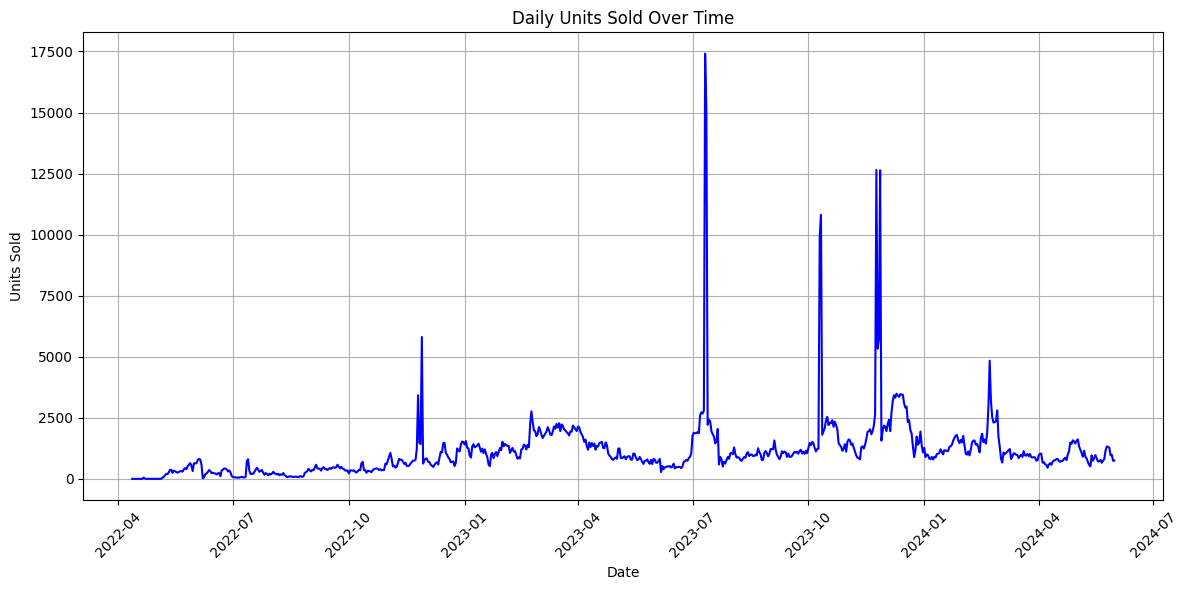

In [23]:
import matplotlib.pyplot as plt


daily_units = train_copy.groupby('date')['units'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_units, linestyle='-', color='b')
plt.title('Daily Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


high sales spikes, particularlyaround October 2022, July 2023, October 2023, and another smaller spike around January 2024.

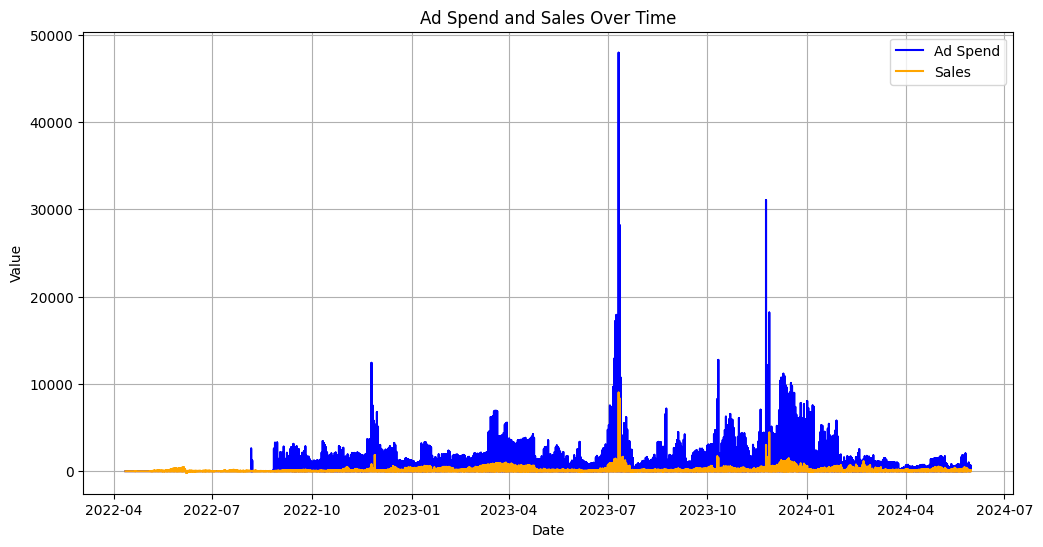

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.plot(train_copy['date'], train_copy['ad_spend'], label='Ad Spend', color='blue')
plt.plot(train_copy['date'], train_copy['units'], label='Sales', color='orange')
plt.title('Ad Spend and Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

The fluctuations in ad spend do **not** highly correlate with changes in sales but there is a slight relation which has to be looked further . Ad spend is significantly higher than sales which is not a good sign  

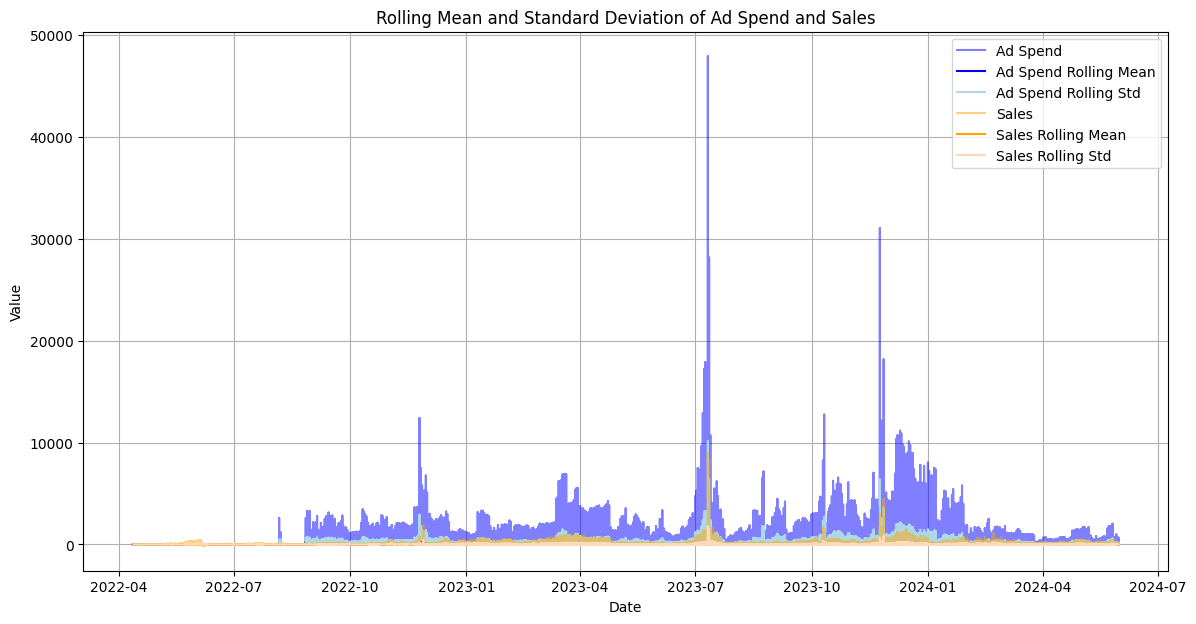

In [25]:

window_size = 30
train_copy['ad_spend_roll_mean'] = train_copy['ad_spend'].rolling(window=window_size).mean()
train_copy['ad_spend_roll_std'] = train_copy['ad_spend'].rolling(window=window_size).std()

train_copy['units_roll_mean'] = train_copy['units'].rolling(window=window_size).mean()
train_copy['units_roll_std'] = train_copy['units'].rolling(window=window_size).std()

plt.figure(figsize=(14, 7))
plt.plot(train_copy['date'], train_copy['ad_spend'], label='Ad Spend', color='blue', alpha=0.5)
plt.plot(train_copy['date'], train_copy['ad_spend_roll_mean'], label='Ad Spend Rolling Mean', color='blue')
plt.plot(train_copy['date'], train_copy['ad_spend_roll_std'], label='Ad Spend Rolling Std', color='lightblue')
plt.plot(train_copy['date'], train_copy['units'], label='Sales', color='orange', alpha=0.5)
plt.plot(train_copy['date'], train_copy['units_roll_mean'], label='Sales Rolling Mean', color='orange')
plt.plot(train_copy['date'], train_copy['units_roll_std'], label='Sales Rolling Std', color='peachpuff')


plt.title('Rolling Mean and Standard Deviation of Ad Spend and Sales')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

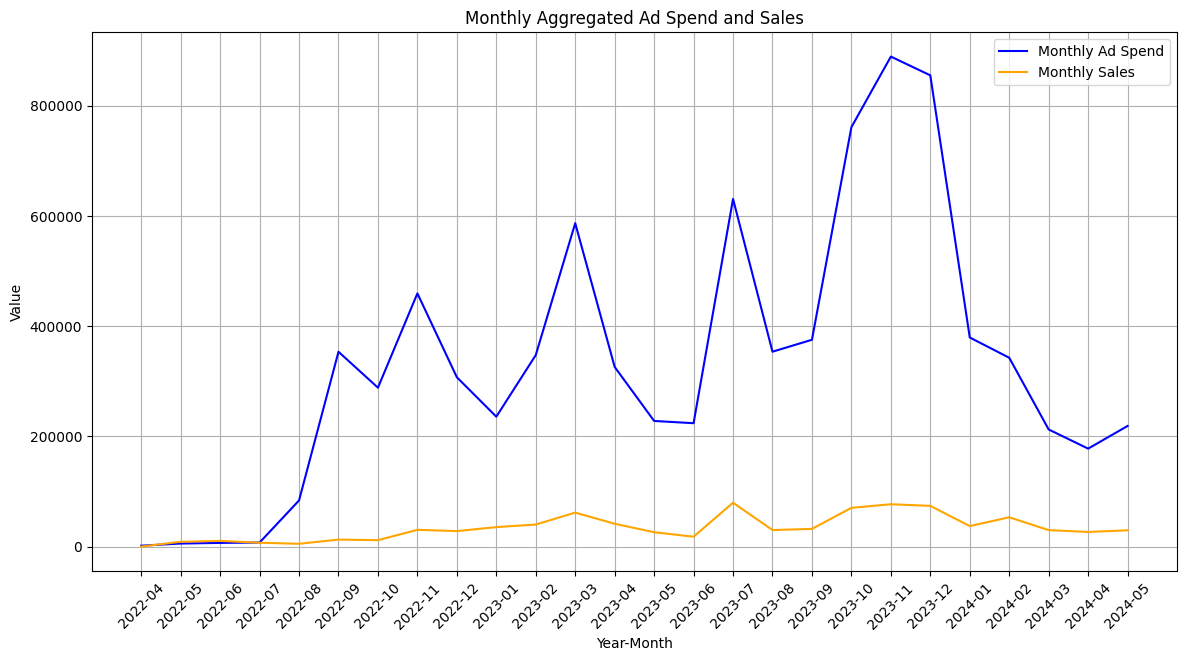

In [26]:

train_copy['year_month'] = train_copy['date'].dt.to_period('M')


monthly_data = train_copy.groupby('year_month').agg({
    'ad_spend': 'sum',
    'units': 'sum'
}).reset_index()



plt.figure(figsize=(14, 7))


plt.plot(monthly_data['year_month'].astype(str), monthly_data['ad_spend'], label='Monthly Ad Spend', color='blue')
plt.plot(monthly_data['year_month'].astype(str), monthly_data['units'], label='Monthly Sales', color='orange')


plt.title('Monthly Aggregated Ad Spend and Sales')
plt.xlabel('Year-Month')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


This clearly shows that spending in ad has not really helped and there is a high ad sending from mid 2023 to end of 2023 .

In [27]:
!pip install plotly


In [28]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
train_copy['day_of_week'] = train_copy['date'].dt.day_name()
train_copy['week'] = train_copy['date'].dt.isocalendar().week
train_copy['month'] = train_copy['date'].dt.month_name()
train_copy['quarter'] = train_copy['date'].dt.to_period('Q').astype(str)

# Function to plot average units by day of the week
def plot_units_by_day():
    day_of_week_sales = train_copy.groupby('day_of_week')['units'].mean()
    day_of_week_sales = day_of_week_sales.reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

    fig = go.Bar(
        x=day_of_week_sales.index,
        y=day_of_week_sales.values,
        marker_color='skyblue'
    )
    return fig

# Function to plot average units by week
def plot_units_by_week():
    week_sales = train_copy.groupby('week')['units'].mean()

    fig = go.Bar(
        x=week_sales.index,
        y=week_sales.values,
        marker_color='lightgreen'
    )
    return fig

# Function to plot average units by month
def plot_units_by_month():
    month_sales = train_copy.groupby('month')['units'].mean()
    month_sales=month_sales.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July','August','September','October','November','December'])
    fig = go.Bar(
        x=month_sales.index,
        y=month_sales.values,
        marker_color='lightcoral'
    )
    return fig

# Function to plot average units by quarter
def plot_units_by_quarter():
    quarter_sales = train_copy.groupby('quarter')['units'].mean()

    fig = go.Bar(
        x=quarter_sales.index,
        y=quarter_sales.values,
        marker_color='lightblue'
    )
    return fig

# Create a 2x2 subplot
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=('Units Sold by Day', 'Units Sold by Week', 'Units Sold by Month', 'Units Sold by Quarter'))

# Add plots to subplots
fig.add_trace(plot_units_by_day(), row=1, col=1)
fig.add_trace(plot_units_by_week(), row=1, col=2)
fig.add_trace(plot_units_by_month(), row=2, col=1)
fig.add_trace(plot_units_by_quarter(), row=2, col=2)

# Update layout
fig.update_layout(title_text='Average Units Sold: Time Series Analysis',
                  height=800, width=1000,
                  showlegend=False)

# Show the combined plot
fig.show()

* Units Sold by Day: Sales exhibit fluctuations, with mid-week (Wednesday and Thursday) showing higher average sales.

* Units Sold by Month:Holiday Seson of October-November-December have a high sales simialarly Independence day seson of US July also has high sales

* Units Sold by Week: Sales exhibit variability across weeks, with some weeks showing higher average sales than others. Consider exploring weekly patterns or events that impact sales.
* 2023 Q4 has the best sales of all . Usualy Q4s perform well . Followed by Q2s and Q3s

In [29]:
train_copy.columns

Index(['ID', 'date', 'Item Id', 'Item Name', 'ad_spend', 'anarix_id', 'units',
       'unit_price', 'orderedrevenueamount', 'ROAS', 'ad_spend_roll_mean',
       'ad_spend_roll_std', 'units_roll_mean', 'units_roll_std', 'year_month',
       'day_of_week', 'week', 'month', 'quarter'],
      dtype='object')

### Other Visualization

In [30]:

# 1. Ad Spend vs. Units Sold Correlation
def plot_ad_spend_vs_units_sold():
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=train_copy['ad_spend'],
        y=train_copy['units'],
        mode='markers',
        marker=dict(color='blue', size=8),
        name='Ad Spend vs. Units Sold'
    ))
    fig.update_layout(title='Ad Spend vs. Units Sold',
                      xaxis_title='Ad Spend',
                      yaxis_title='Units Sold')
    return fig

# 2. Unit Price vs. Ordered Revenue Amount
def plot_unit_price_vs_revenue():
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=train_copy['unit_price'],
        y=train_copy['orderedrevenueamount'],
        mode='markers',
        marker=dict(color='green', size=8),
        name='Unit Price vs. Ordered Revenue Amount'
    ))
    fig.update_layout(title='Unit Price vs. Ordered Revenue Amount',
                      xaxis_title='Unit Price',
                      yaxis_title='Ordered Revenue Amount')
    return fig

# 3. Compare Units Sold for Low-Cost vs. High-Cost Items
def plot_units_sold_by_cost():
    high_cost_threshold = train_copy['unit_price'].median()
    train_copy['cost_category'] = train_copy['unit_price'].apply(lambda x: 'High Cost' if x > high_cost_threshold else 'Low Cost')
    cost_category_sales = train_copy.groupby('cost_category')['units'].mean()

    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=cost_category_sales.index,
        y=cost_category_sales.values,
        marker_color=['red', 'blue']
    ))
    fig.update_layout(title='Units Sold by Cost Category',
                      xaxis_title='Cost Category',
                      yaxis_title='Average Units Sold')
    return fig

# 4. Item Id vs. Units Sold
def plot_item_id_vs_units_sold():
    item_sales = train_copy.groupby('Item Id')['units'].sum().sort_values(ascending=False)[:50]

    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=item_sales.index,
        y=item_sales.values,
        marker_color='orange'
    ))
    fig.update_layout(title='Item Id vs. Units Sold',
                      xaxis_title='Item Name',
                      yaxis_title='Total Units Sold')
    return fig

# 5. Bar Chart for Top-Selling Items
def plot_top_selling_items():
    top_items = train_copy.groupby('Item Name')['units'].sum().sort_values(ascending=False).head(10)

    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=top_items.index,
        y=top_items.values,
        marker_color='purple'
    ))
    fig.update_layout(title='Top-Selling Items',
                      xaxis_title='Item Name',
                      yaxis_title='Total Units Sold')
    return fig

# 6. Box Plot for Unit Prices
def plot_box_plot_unit_prices():
    fig = go.Figure()
    fig.add_trace(go.Box(
        y=train_copy['unit_price'],
        name='Unit Price',
        marker_color='pink'
    ))
    fig.update_layout(title='Box Plot for Unit Prices',
                      yaxis_title='Unit Price')
    return fig

# New function to plot ROAS vs Unit Price
def plot_roas_vs_unit_price():
    # Ensure ROAS is calculated
    train_copy['ROAS'] = train_copy.apply(
        lambda row: row['orderedrevenueamount'] / row['ad_spend'] if pd.notna(row['ad_spend']) and row['ad_spend'] > 0 else np.nan,
        axis=1
    )

    filtered_df = train_copy.dropna(subset=['ROAS'])

    fig = go.Figure()

    # Add scatter plot for ROAS vs Unit Price
    fig.add_trace(go.Scatter(
        x=filtered_df['unit_price'],
        y=filtered_df['ROAS'],
        mode='markers',
        marker=dict(color='purple', size=8, opacity=0.6),
        name='ROAS vs Unit Price'
    ))

    fig.update_layout(
        title='ROAS vs Unit Price',
        xaxis_title='Unit Price',
        yaxis_title='ROAS',
        showlegend=False
    )

    return fig

# Create a 2x3 subplot layout
fig = make_subplots(rows=2, cols=3,
                    subplot_titles=('Ad Spend vs. Units Sold',
                                    'Unit Price vs. Ordered Revenue Amount',
                                    'Units Sold by Cost Category',
                                    'Item Id vs. Units Sold (Top 50)',
                                    'Box Plot for Unit Prices',
                                    'ROAS vs Unit Price'))

# Add plots to subplots
fig.add_trace(plot_ad_spend_vs_units_sold().data[0], row=1, col=1)
fig.add_trace(plot_unit_price_vs_revenue().data[0], row=1, col=2)
fig.add_trace(plot_units_sold_by_cost().data[0], row=1, col=3)
fig.add_trace(plot_item_id_vs_units_sold().data[0], row=2, col=1)
fig.add_trace(plot_box_plot_unit_prices().data[0], row=2, col=2)
fig.add_trace(plot_roas_vs_unit_price().data[0], row=2, col=3)

# Update layout
fig.update_layout(title_text='Analysis Plots',
                  height=1000, width=1200,
                  showlegend=False)

# Show the combined plot
fig.show()


* Ad Spend vs. Units Sold:
As ad spend increases, units sold tend to increase. There’s a positive correlation between advertising investment and sales volume.
* Unit Price vs. Ordered Revenue Amount:
Lower unit prices may lead to higher ordered revenue amounts, although the relationship is not strictly linear. Pricing strategy impacts revenue.
* Units Sold by Cost Category:
Significantly more units are sold in the ‘High Cost’ category compared to the ‘Low Cost’ category. Consider analyzing profitability and market positioning.


In [59]:
plot_top_selling_items()

In [32]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np


filtered_df = train_copy.dropna(subset=['ROAS'])

# Create bins for ad spend
bins = [0, 100, 500, 1000, 5000, 10000, np.inf]
labels = ['0-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
filtered_df['ad_spend_bin'] = pd.cut(filtered_df['ad_spend'], bins=bins, labels=labels, include_lowest=True)

# Create a box plot for ROAS by ad spend categories
def plot_roas_by_ad_spend_categories():
    fig = go.Figure()

    # Add box plot for each ad spend bin
    for label in labels:
        subset = filtered_df[filtered_df['ad_spend_bin'] == label]
        fig.add_trace(go.Box(
            y=subset['ROAS'],
            name=label,
            boxmean='sd',  # Show mean and standard deviation
            marker=dict(color='rgba(219, 64, 82, 0.7)'),
            line=dict(color='rgba(219, 64, 82, 0.7)')
        ))

    fig.update_layout(
        title='ROAS Distribution by Ad Spend Categories',
        xaxis_title='Ad Spend Category',
        yaxis_title='ROAS',
        showlegend=False
    )

    return fig

# Show the plot
plot_roas_by_ad_spend_categories().show()


<ipython-input-32-375586f4cda2>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Return on Ad spent on product higher than 100  is very much low and non existent on products greater than 500

### Correlation

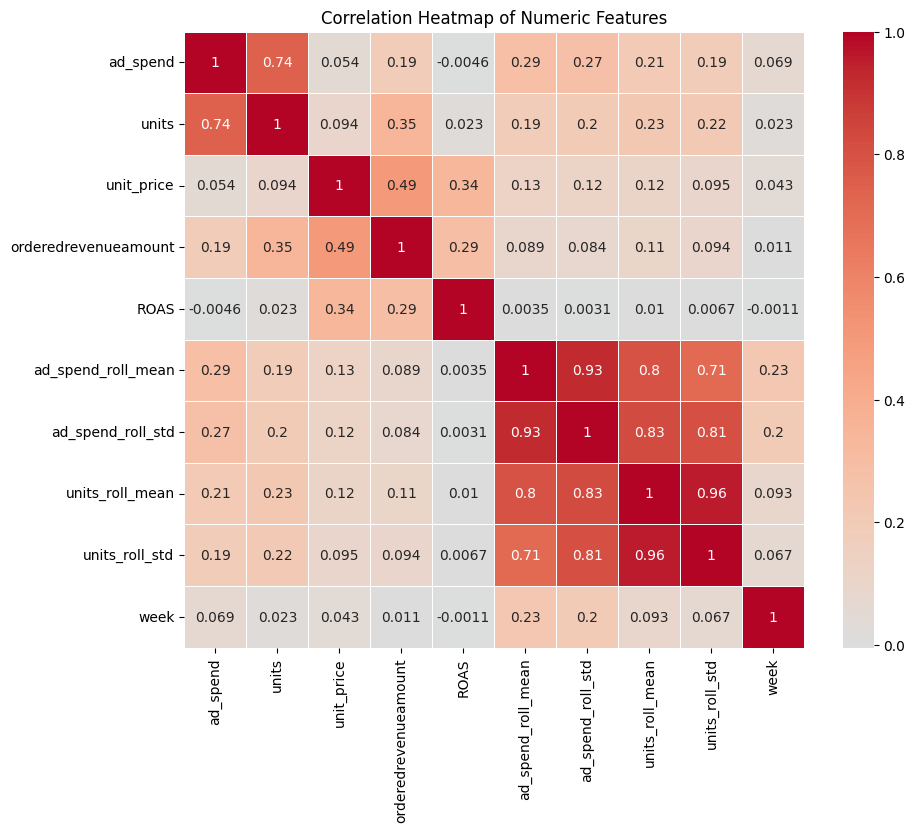

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train_copy is your DataFrame
# Compute the correlation matrix for all numeric features
correlation_matrix = train_copy.select_dtypes(include='number').corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

# Set the title and labels
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [34]:
train_copy.to_csv("df.csv")

In [35]:
train_copy.isnull().sum()

ID                          0
date                        0
Item Id                     0
Item Name                   0
ad_spend                    0
anarix_id                   0
units                       0
unit_price                  0
orderedrevenueamount        0
ROAS                    22770
ad_spend_roll_mean         29
ad_spend_roll_std          29
units_roll_mean            29
units_roll_std             29
year_month                  0
day_of_week                 0
week                        0
month                       0
quarter                     0
cost_category               0
dtype: int64

# Modeling

In [36]:
train_copy.columns


Index(['ID', 'date', 'Item Id', 'Item Name', 'ad_spend', 'anarix_id', 'units',
       'unit_price', 'orderedrevenueamount', 'ROAS', 'ad_spend_roll_mean',
       'ad_spend_roll_std', 'units_roll_mean', 'units_roll_std', 'year_month',
       'day_of_week', 'week', 'month', 'quarter', 'cost_category'],
      dtype='object')

In [37]:
# import pandas as pd
# from sklearn.feature_selection import SelectKBest, f_regression
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestRegressor

# # Assuming `train_copy` is your DataFrame
# # Drop non-numeric columns
# numeric_features = ['ad_spend', 'unit_price', 'orderedrevenueamount', 'ROAS']
# categorical_features = ['Item Id', 'day_of_week', 'week', 'month', 'quarter', 'cost_category']

# # Example feature engineering
# train_copy['price_change'] = train_copy['unit_price'].diff()
# train_copy['ad_spend_per_unit'] = train_copy['ad_spend'] / train_copy['units']
# train_copy['revenue_per_unit'] = train_copy['orderedrevenueamount'] / train_copy['units']

# # Handling missing values
# train_copy.fillna(0, inplace=True)

# # Selecting features
# X = train_copy[numeric_features + categorical_features]
# y = train_copy['units']

# # Categorical feature encoding
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', 'passthrough', numeric_features),
#         ('cat', OneHotEncoder(), categorical_features)
#     ]
# )

# # Feature selection
# selector = SelectKBest(score_func=f_regression, k='all')
# pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                            ('selector', selector)])

# X_selected = pipeline.fit_transform(X, y)

# # Feature importances using RandomForest
# model = RandomForestRegressor()
# model.fit(X_selected, y)
# importances = model.feature_importances_

# # Feature importances output
# print("Feature Importances:")
# for feature, importance in zip(X.columns, importances):
#     print(f"{feature}: {importance}")

# # Print selected features based on importance
# print("Selected Features:")
# selected_features = [feature for feature, importance in zip(X.columns, importances) if importance > 0.01]
# print(selected_features)


Feature Importances: \\
ad_spend: 0.6017854488026021 \\
unit_price: 0.039095168113303776 \\
orderedrevenueamount: 0.23623778895847183 \\
ROAS: 0.010450681487107965 \\
Item Id: 5.518894016291738e-05 \\
day_of_week: 4.690776105718128e-06 \\
week: 6.8579533489047404e-06 \\
month: 4.531846419819792e-07 \\
quarter: 5.347824095792097e-06 \\
cost_category: 6.934765589478883e-07 \\
Selected Features:
['ad_spend', 'unit_price', 'orderedrevenueamount', 'ROAS']

Note that day_of_week ,week ,month ,quarter are all reciprocal exponent so they can be ignored while training .

In [38]:
train_copy.isnull().sum()

ID                          0
date                        0
Item Id                     0
Item Name                   0
ad_spend                    0
anarix_id                   0
units                       0
unit_price                  0
orderedrevenueamount        0
ROAS                    22770
ad_spend_roll_mean         29
ad_spend_roll_std          29
units_roll_mean            29
units_roll_std             29
year_month                  0
day_of_week                 0
week                        0
month                       0
quarter                     0
cost_category               0
dtype: int64

####  This code took longer than 1 hr to run hence it has been scapped and tried in PYSPARK

In [39]:
#  import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.svm import SVR
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import StackingRegressor
# from sklearn.metrics import mean_squared_error

# # Assuming `train_copy` is your DataFrame
# # Example feature columns and target
# X = train_copy[['ad_spend', 'unit_price', 'orderedrevenueamount']]
# y = train_copy['units']

# # Split data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define base models
# base_models = [
#     ('rf', RandomForestRegressor(n_estimators=10, random_state=42)),
#     ('gb', GradientBoostingRegressor(n_estimators=10, random_state=42)),
#     ('svr', SVR(kernel='linear'))
# ]

# # Define meta-learner
# meta_learner = LinearRegression()

# # Create Stacking Regressor
# stacking_model = StackingRegressor(
#     estimators=base_models,
#     final_estimator=meta_learner,
#     cv=5
# )

# # Train stacking model
# stacking_model.fit(X_train, y_train)

# # Make predictions
# y_pred = stacking_model.predict(X_test)

# # Evaluate model
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse:.4f}')

# # Optional: Visualize predictions vs actual values
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 6))
# plt.plot(y_test.values, label='Actual Values')
# plt.plot(y_pred, label='Predicted Values', alpha=0.7)
# plt.xlabel('Sample Index')
# plt.ylabel('Units')
# plt.title('Actual vs Predicted Values')
# plt.legend()
# plt.show()


In [40]:
# import joblib

# # Save the stacking model
# joblib.dump(stacking_model, 'stacking_model.pkl')






# Reffere modeling notebook

# PySpark


In [41]:
pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488490 sha256=1cd81703b7f13e0f72b7d24cc97864057588df0543b35fa18a7f4ca6923c63cd
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [42]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline


In [43]:


# Initialize Spark session
spark = SparkSession.builder \
    .appName("FeatureImportance") \
    .getOrCreate()

# Load data
data_path = "/content/df.csv"
df = spark.read.csv(data_path, header=True, inferSchema=True)

# Feature engineering and conversion for the entire dataset
df = df.withColumn("ad_spend_per_unit", col("ad_spend") / col("units"))
df = df.withColumn("revenue_per_unit", col("orderedrevenueamount") / col("units"))
df = df.withColumn("ad_spend", col("ad_spend").cast("double"))
df = df.withColumn("unit_price", col("unit_price").cast("double"))
df = df.withColumn("orderedrevenueamount", col("orderedrevenueamount").cast("double"))
df = df.withColumn("ROAS", col("ROAS").cast("double"))
df = df.withColumn("ad_spend_per_unit", col("ad_spend_per_unit").cast("double"))
df = df.withColumn("revenue_per_unit", col("revenue_per_unit").cast("double"))
df = df.withColumn("units", col("units").cast("double"))


df.printSchema()

train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

numeric_features = ['ad_spend', 'unit_price', 'orderedrevenueamount', 'ROAS', 'ad_spend_per_unit', 'revenue_per_unit']
categorical_features = ['Item Id', 'Item Name', 'week', 'month', 'quarter', 'cost_category']


indexers = [StringIndexer(inputCol=column, outputCol=column+"_index", handleInvalid='skip') for column in categorical_features]
encoders = [OneHotEncoder(inputCol=column+"_index", outputCol=column+"_ohe") for column in categorical_features]

assembler = VectorAssembler(inputCols=numeric_features + [column+"_ohe" for column in categorical_features],
                            outputCol="features", handleInvalid="skip")

rf = RandomForestRegressor(featuresCol="features", labelCol="units")
pipeline = Pipeline(stages=indexers + encoders + [assembler, rf])


rf_model = pipeline.fit(train_data)


rf_model_stages = rf_model.stages[-1]

# Get feature importances
importances = rf_model_stages.featureImportances.toArray()

# Create a list of feature names and their importance scores
encoded_feature_names = assembler.getInputCols()
feature_importances = [(feature, importance) for feature, importance in zip(encoded_feature_names, importances)]

# Display feature importances
print("Feature Importances:")
for feature, importance in feature_importances:
    print(f"{feature}: {importance}")

# Print selected features based on importance
selected_features = [feature for feature, importance in feature_importances if importance > 0.01]
print("Selected Features:")
print(selected_features)


root
 |-- _c0: integer (nullable = true)
 |-- ID: string (nullable = true)
 |-- date: date (nullable = true)
 |-- Item Id: string (nullable = true)
 |-- Item Name: string (nullable = true)
 |-- ad_spend: double (nullable = true)
 |-- anarix_id: string (nullable = true)
 |-- units: double (nullable = true)
 |-- unit_price: double (nullable = true)
 |-- orderedrevenueamount: double (nullable = true)
 |-- ROAS: double (nullable = true)
 |-- ad_spend_roll_mean: double (nullable = true)
 |-- ad_spend_roll_std: double (nullable = true)
 |-- units_roll_mean: double (nullable = true)
 |-- units_roll_std: double (nullable = true)
 |-- year_month: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- week: string (nullable = true)
 |-- month: string (nullable = true)
 |-- quarter: string (nullable = true)
 |-- cost_category: string (nullable = true)
 |-- ad_spend_per_unit: double (nullable = true)
 |-- revenue_per_unit: double (nullable = true)

Feature Importances:
ad_spend: 

In [44]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import col

# Make predictions on the test data
predictions = rf_model.transform(test_data)

# Show some example predictions
predictions.select("prediction", "units", "features").show(5)

# Evaluate the model
evaluator = RegressionEvaluator(
    labelCol="units",
    predictionCol="prediction",
    metricName="rmse"  # Root Mean Squared Error
)

# Calculate RMSE
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate MSE
evaluator.setMetricName("mse")  # Mean Squared Error
mse = evaluator.evaluate(predictions)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate R2 (Coefficient of Determination)
evaluator.setMetricName("r2")  # R2 score
r2 = evaluator.evaluate(predictions)
print(f"R2 Score: {r2}")

# Optionally, you can also calculate other metrics if needed
# e.g., Mean Absolute Error (MAE)
evaluator.setMetricName("mae")  # Mean Absolute Error
mae = evaluator.evaluate(predictions)
print(f"Mean Absolute Error (MAE): {mae}")


+-----------------+-----+--------------------+
|       prediction|units|            features|
+-----------------+-----+--------------------+
|3.412481820477592|  4.0|(523,[0,4,15,232,...|
|3.412481820477592|  2.0|(523,[0,4,15,232,...|
|3.412481820477592|  8.0|(523,[0,4,15,232,...|
|3.412481820477592|  6.0|(523,[0,4,15,232,...|
|3.412481820477592|  5.0|(523,[0,4,15,232,...|
+-----------------+-----+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE): 25.626685432986516
Mean Squared Error (MSE): 656.7270062812432
R2 Score: 0.7912146853648485
Mean Absolute Error (MAE): 7.46880523886467


In [45]:
spark.stop()

### Stacking

In [46]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml import Pipeline


In [47]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import functions as F

In [48]:

# # Stop the current session if it exists
# spark.stop()

# Start a new Spark session with increased memory
spark = SparkSession.builder \
    .appName("StackingModel") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.memory", "4g") \
    .getOrCreate()


In [49]:


# Load data
data_path = "/content/df.csv"
df = spark.read.csv(data_path, header=True, inferSchema=True)

# Feature engineering
df = df.withColumn("ad_spend_per_unit", col("ad_spend") / col("units"))
df = df.withColumn("revenue_per_unit", col("orderedrevenueamount") / col("units"))



# Convert columns to numeric
df = df.withColumn("ad_spend", F.col("ad_spend").cast("double"))
df = df.withColumn("unit_price", F.col("unit_price").cast("double"))
df = df.withColumn("orderedrevenueamount", F.col("orderedrevenueamount").cast("double"))
df = df.withColumn("ROAS", F.col("ROAS").cast("double"))
df = df.withColumn("ad_spend_per_unit", F.col("ad_spend_per_unit").cast("double"))
df = df.withColumn("revenue_per_unit", F.col("revenue_per_unit").cast("double"))
df = df.withColumn("units", F.col("units").cast("double"))

# Split data into training and testing sets
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)


In [50]:
train_data

DataFrame[_c0: int, ID: string, date: date, Item Id: string, Item Name: string, ad_spend: double, anarix_id: string, units: double, unit_price: double, orderedrevenueamount: double, ROAS: double, ad_spend_roll_mean: double, ad_spend_roll_std: double, units_roll_mean: double, units_roll_std: double, year_month: string, day_of_week: string, week: string, month: string, quarter: string, cost_category: string, ad_spend_per_unit: double, revenue_per_unit: double]

In [51]:
 from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor, GBTRegressor, DecisionTreeRegressor
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Define categorical features
categorical_features = ['Item Id', 'Item Name']
numeric_features = ['ad_spend', 'unit_price']

# Index and encode categorical features
indexers = [StringIndexer(inputCol=feature, outputCol=feature+"_index", handleInvalid='skip') for feature in categorical_features]
encoders = [OneHotEncoder(inputCol=feature+"_index", outputCol=feature+"_ohe") for feature in categorical_features]

# Combine all features into a feature vector
assembler = VectorAssembler(
    inputCols=numeric_features + [feature+"_ohe" for feature in categorical_features],
    outputCol="features",
    handleInvalid="skip"
)

# Define the models
rf_regressor = RandomForestRegressor(featuresCol="features", labelCol="units")
gb_regressor = GBTRegressor(featuresCol="features", labelCol="units")
dt_regressor = DecisionTreeRegressor(featuresCol="features", labelCol="units")

# Create pipelines for base models
pipeline_rf = Pipeline(stages=indexers + encoders + [assembler, rf_regressor])
pipeline_gb = Pipeline(stages=indexers + encoders + [assembler, gb_regressor])
pipeline_dt = Pipeline(stages=indexers + encoders + [assembler, dt_regressor])

# Split data into training and testing sets
train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

# Train base models
rf_model = pipeline_rf.fit(train_data)
gb_model = pipeline_gb.fit(train_data)
dt_model = pipeline_dt.fit(train_data)





In [52]:
from pyspark.sql.functions import when, lit

# Replace negative values in 'units' with 0
df = df.withColumn("units", when(col("units") < 0, lit(0)).otherwise(col("units")))


In [53]:
# # Generate predictions from base models and add features column to test_data
# rf_predictions = rf_model.transform(test_data).select("features", "prediction", "units").withColumnRenamed("prediction", "rf_prediction")
# gb_predictions = gb_model.transform(test_data).select("features", "prediction", "units").withColumnRenamed("prediction", "gb_prediction")
# dt_predictions = dt_model.transform(test_data).select("features", "prediction", "units").withColumnRenamed("prediction", "dt_prediction")

# # Combine predictions to create meta-features
# meta_features = rf_predictions.join(gb_predictions, on=["features", "units"], how="inner")
# meta_features = meta_features.join(dt_predictions, on=["features", "units"], how="inner")
# meta_features = meta_features.select("features", "rf_prediction", "gb_prediction", "dt_prediction", "units") # Include 'units' here

# # Define and train meta-learner
# assembler_meta = VectorAssembler(inputCols=["rf_prediction", "gb_prediction", "dt_prediction"], outputCol="meta_features") # Change outputCol to 'meta_features'
# # Apply the transformation to create 'meta_features' column
# meta_features_assembled = assembler_meta.transform(meta_features)

# # Replace negative values in 'units' within meta_features_assembled
# meta_features_assembled = meta_features_assembled.withColumn("units", when(col("units") < 0, lit(0)).otherwise(col("units")))

# # Define and train meta-learner (unchanged)
# meta_learner = LogisticRegression(featuresCol="meta_features", labelCol="units") # Use the new 'meta_features' column
# stacking_model = meta_learner.fit(meta_features_assembled) # Fit the model on the assembled meta-features

# # ... (rest of your code)
# # Make final predictions
# final_predictions = stacking_model.transform(meta_features_assembled) # Transform using the assembled meta-features

# # Evaluate the stacking model
# # ... (rest of your evaluation code)

In [54]:
# # Generate predictions from base models and add features column to test_data
# rf_predictions = rf_model.transform(test_data).select("features", "prediction", "units").withColumnRenamed("prediction", "rf_prediction")
# gb_predictions = gb_model.transform(test_data).select("features", "prediction", "units").withColumnRenamed("prediction", "gb_prediction")
# dt_predictions = dt_model.transform(test_data).select("features", "prediction", "units").withColumnRenamed("prediction", "dt_prediction")

# # Combine predictions to create meta-features
# meta_features = rf_predictions.join(gb_predictions, on=["features", "units"], how="inner")
# meta_features = meta_features.join(dt_predictions, on=["features", "units"], how="inner")
# meta_features = meta_features.select("features", "rf_prediction", "gb_prediction", "dt_prediction", "units") # Include 'units' here
# meta_features_assembled =meta_features
# # Define and train meta-learner
# assembler_meta = VectorAssembler(inputCols=["rf_prediction", "gb_prediction", "dt_prediction"], outputCol="meta_features") # Change outputCol to 'meta_features'
# # Replace negative values in 'units' within meta_features_assembled
# meta_features_assembled = meta_features_assembled.withColumn("units", when(col("units") < 0, lit(0)).otherwise(col("units")))

# # Define and train meta-learner (unchanged)
# meta_learner = LogisticRegression(featuresCol="meta_features", labelCol="units") # Use the new 'meta_features' column
# stacking_model = meta_learner.fit(meta_features_assembled) # Fit the model on the assembled meta-features

# # ... (rest of your code)
# # Make final predictions
# final_predictions = stacking_model.transform(meta_features_assembled) # Transform using the assembled meta-features

# # Evaluate the stacking model
# # ... (rest of your evaluation code)

In [55]:

# # Evaluate the stacking model
# # ... (rest of your evaluation code)

# # Evaluate the stacking model
# evaluator = RegressionEvaluator(labelCol="units", metricName="rmse")
# rmse = evaluator.evaluate(final_predictions)
# print(f"Root Mean Squared Error (RMSE) on test data = {rmse}")

# mse = evaluator.setMetricName("mse").evaluate(final_predictions)
# print(f"Mean Squared Error (MSE) on test data = {mse}")

# mae = evaluator.setMetricName("mae").evaluate(final_predictions)
# print(f"Mean Absolute Error (MAE) on test data = {mae}")

# r2 = evaluator.setMetricName("r2").evaluate(final_predictions)
# print(f"R2 Score on test data = {r2}")

In [56]:
# final_predictions.show(20)

In [57]:
# # Save individual models
# rf_model.save('rf_model')
# gb_model.save('gb_model')
# dt_model.save('dt_model')

# # Save the stacking model pipeline
# stacking_model.save('stacking_pipeline')


In [58]:
# from pyspark.ml import PipelineModel

# # Load individual models
# rf_model = RandomForestRegressor.load('rf_model')
# gb_model = GradientBoostingRegressor.load('gb_model')
# dt_model = DecisionTreeRegressor.load('dt_model')

# # Load the stacking pipeline
# stacking_pipeline = PipelineModel.load('stacking_pipeline')
